In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\yolai\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_in_software_pivot = pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')

df_in_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [4]:
df_in = df[df['job_country'] == 'India'].copy()
df_in['job_posted_month'] = df_in['job_posted_date'].dt.strftime('%B')
df_in_pivot = df_in.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_in_pivot = df_in_pivot.reset_index()
df_in_pivot['month_no'] = pd.to_datetime(df_in_pivot['job_posted_month'],format='%B').dt.month
df_in_pivot = df_in_pivot.sort_values('month_no')
df_in_pivot = df_in_pivot.set_index('job_posted_month')
df_in_pivot = df_in_pivot.drop(columns='month_no')

In [7]:
df_in_merged = df_in_pivot.merge(df_in_software_pivot, on= "job_posted_month")


In [15]:
top_7 = (
    df_in_merged
    .sum()
    .sort_values(ascending=False)
    .head(7)
    .index
    .to_list()
)
top_7

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Engineer',
 'Data Scientist',
 'Data Analyst']

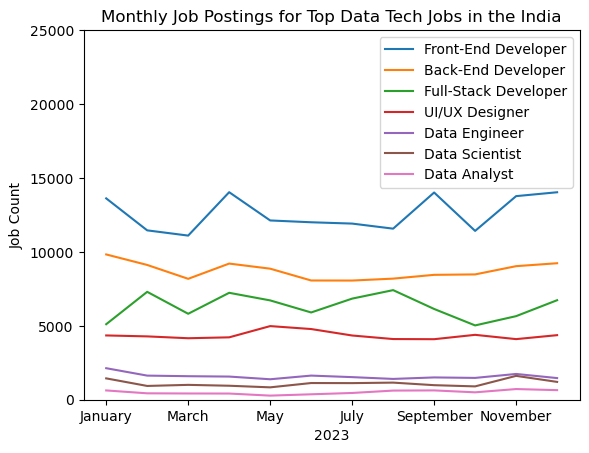

In [16]:
df_in_merged[top_7].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Tech Jobs in the India')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.ylim(0, 25000)
plt.legend()
plt.show()